<a href="https://colab.research.google.com/github/elinneaeriksson/Applied_AI_Project/blob/main/Project_AppliedAI(withSuperSimpleXGBoostRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load training data

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# The path of the dataset
#project_path = '/content/gdrive/MyDrive/Samhällsbyggnadsprogrammet/AH2179/Project/'
#Linneas path:
project_path = '/content/gdrive/MyDrive/Project Applied AI/Data/'
df=pd.read_csv(project_path+'training_dataset.csv',sep=';')
#Print data
df.head()

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0


In [3]:
df.describe()

,DP_ID,Date,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
count,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921967e+06,1.921905e+06
mean,2.391436e+03,2.021091e+07,4.298932e+02,8.557945e+01,2.819306e+01,1.384524e+01,6.669162e+00,2.002764e+01,1.236552e+01
std,1.891637e+03,2.010941e+02,1.017515e+02,2.035077e+01,6.780857e+00,3.384322e+00,1.678570e+00,3.027135e+00,8.023255e+00
min,1.530000e+02,2.021060e+07,2.400000e+02,4.800000e+01,1.600000e+01,8.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00
25%,5.430000e+02,2.021072e+07,3.450000e+02,6.900000e+01,2.300000e+01,1.100000e+01,5.000000e+00,1.809000e+01,5.000000e+00
50%,1.254000e+03,2.021092e+07,4.330000e+02,8.600000e+01,2.800000e+01,1.400000e+01,7.000000e+00,1.985000e+01,1.200000e+01
75%,4.437000e+03,2.021111e+07,5.180000e+02,1.030000e+02,3.400000e+01,1.700000e+01,8.000000e+00,2.194000e+01,1.900000e+01
max,4.873000e+03,2.021123e+07,6.000000e+02,1.200000e+02,4.000000e+01,2.000000e+01,1.000000e+01,4.583000e+01,4.500000e+01


In [4]:
## remove NaN FLOW ##
df.dropna()

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1921962,353,"E4S 57,055",20211231,10:00:00,600,120,40,20,10,17.45,11.0
1921963,543,"E4S 56,780",20211231,10:00:00,600,120,40,20,10,18.09,11.0
1921964,153,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,23.53,7.0
1921965,351,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,18.49,9.0


In [5]:

df_portal = df.groupby(['PORTAL'])
df_portal['DP_ID'].unique()
#= len(df_portal['DP_ID'].unique())
#print(length)

In [6]:
#Dictionary
lengthDict = {
"E4S 55,620" : 3,
"E4S 56,160" : 3,
"E4S 56,490" : 4,
"E4S 56,780" : 4,
"E4S 57,055" : 3,
"E4S 57,435" : 4,
"E4S 57,820" : 4,
"E4S 58,140" : 5
               }

In [7]:
def weighted_average(dataframe, value, weight):
   val = dataframe[value]
   wt = dataframe[weight]
   return (val * wt).sum() / wt.sum()


# Combine the two groupby operations
result = df.dropna().groupby(['PORTAL', 'Date', 'Interval_1']).agg(
   FLOW_SUM=('FLOW', 'sum'),  # Summing FLOW
   SPEED_WEIGHTED_AVG=('SPEED_MS_AVG', lambda x: weighted_average(df.loc[x.index], 'SPEED_MS_AVG', 'FLOW'))  # Applying weighted average
)


print(result)


                                FLOW_SUM  SPEED_WEIGHTED_AVG
PORTAL     Date     Interval_1                              
E4S 55,620 20210601 240             29.0           21.683103
                    241             26.0           21.933077
                    242             38.0           21.563684
                    243             34.0           22.681176
                    244             29.0           23.126552
...                                  ...                 ...
E4S 58,140 20211231 596             19.0           21.507895
                    597             28.0           20.806071
                    598             23.0           21.352609
                    599             19.0           21.491579
                    600             20.0           21.429000

[604026 rows x 2 columns]


In [8]:
# Step 2: Sort the result by 'Interval_1' to ensure proper rolling operation
result2 = result.sort_values(by='Interval_1')

In [9]:
# Step 3: Add a column for the sum of the next 15 interval_1 flow values
# We'll group by 'PORTAL' and 'Date' to ensure rolling within each group
result2['FLOW_NEXT_15_SUM'] = result2.groupby(['PORTAL', 'Date'])['FLOW_SUM'].transform(
   lambda x: x.rolling(window=15, min_periods=1).sum().shift(-14)
)

print(result2)

                                FLOW_SUM  SPEED_WEIGHTED_AVG  FLOW_NEXT_15_SUM
PORTAL     Date     Interval_1                                                
E4S 57,435 20211019 240              3.0           23.613333              38.0
E4S 57,820 20210617 240              4.0           21.807500              55.0
E4S 56,160 20210822 240              7.0           25.431429              93.0
E4S 57,055 20210721 240             23.0           21.538261             321.0
E4S 58,140 20211222 240              3.0           20.830000              79.0
...                                  ...                 ...               ...
E4S 55,620 20210601 600             68.0           19.490147               NaN
E4S 56,780 20211021 600             72.0           17.653333               NaN
E4S 57,820 20210911 600             49.0           20.334490               NaN
E4S 58,140 20211231 600             20.0           21.429000               NaN
E4S 56,780 20211022 600             60.0           1

## Do a really simple linear regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [26]:
#x = df.drop(['FLOW_NEXT_15_SUM'], axis=1)
result2 = result2.dropna()
x = result2['FLOW_SUM']
print(x.info)


y = result2['FLOW_NEXT_15_SUM']
print(y.info)

<bound method Series.info of PORTAL      Date      Interval_1
E4S 57,435  20211019  240            3.0
E4S 57,820  20210617  240            4.0
E4S 56,160  20210822  240            7.0
E4S 57,055  20210721  240           23.0
E4S 58,140  20211222  240            3.0
                                    ... 
E4S 56,780  20211020  586           75.0
E4S 56,160  20210811  586           63.0
E4S 56,780  20211021  586           46.0
E4S 57,435  20210608  586           60.0
E4S 57,820  20211123  586           68.0
Name: FLOW_SUM, Length: 580199, dtype: float64>
<bound method Series.info of PORTAL      Date      Interval_1
E4S 57,435  20211019  240            38.0
E4S 57,820  20210617  240            55.0
E4S 56,160  20210822  240            93.0
E4S 57,055  20210721  240           321.0
E4S 58,140  20211222  240            79.0
                                    ...  
E4S 56,780  20211020  586           939.0
E4S 56,160  20210811  586           555.0
E4S 56,780  20211021  586           918.0

In [27]:
# 20 % used for training
X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1,1), y, test_size=0.2, random_state=42)
print(y_train)
print(X_train)

PORTAL      Date      Interval_1
E4S 57,435  20211227  546            523.0
E4S 57,055  20210830  432            870.0
E4S 58,140  20210802  272             70.0
E4S 57,435  20211119  293            123.0
E4S 56,780  20210623  454           1063.0
                                     ...  
E4S 58,140  20210904  307             79.0
E4S 57,820  20211121  396            152.0
E4S 56,160  20210608  459            841.0
E4S 56,490  20210810  320            637.0
E4S 58,140  20211005  314            232.0
Name: FLOW_NEXT_15_SUM, Length: 464159, dtype: float64
[[24.]
 [73.]
 [ 7.]
 ...
 [50.]
 [42.]
 [16.]]


In [39]:
#model=LinearRegression()
import xgboost as xgb

# Using grid search for hyperparameter tuning
model = xgb.XGBRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print("Coefficients: "+ model.coef_)
#print("Intercept" + model.intercept_)

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 67.69492402811454
Mean Squared Error: 8111.1695985504475
R-squared: 0.917415512319161


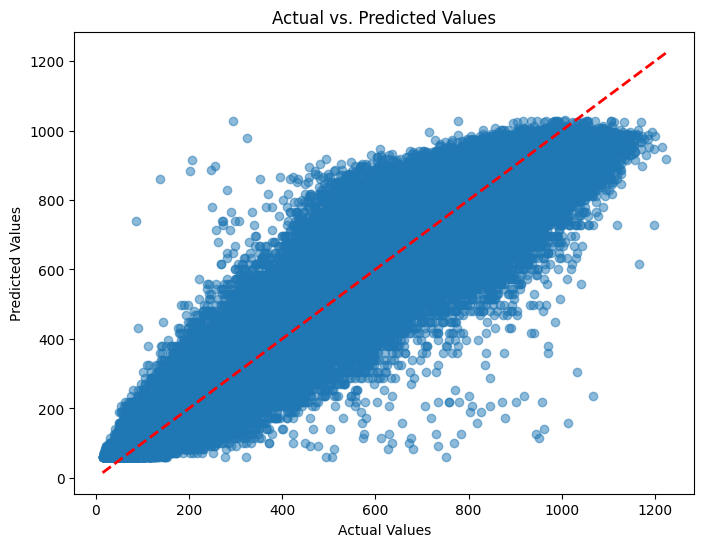

In [41]:

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
#diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

plt.show()

In [ ]:

"""past_flow= []
full_list = []

for i in range(100,0,-1):
#the loop goes backwards.

#when we have 15 values in the array:
  if len(past_flow) == 15:
    full_list.append(sum(past_flow))
#summarize all values in the array and add in a new list

#add the value in an array that can contain 15 values.
  if len(past_flow) < 15:
    #past_flow.append(flow_sum[flow_sum['Interval_1']==i and flow_sum['PORTAL']=='E4S 55,620'])
     past_flow.append(flow_sum.loc[('E4S 55,620', slice(None), i)])
  else:
    past_flow.pop(0)
    #when the array is full the oldest value is swapped to a new one
    past_flow.append(flow_sum.loc[('E4S 55,620', slice(None), i)])

print("past_flow = ", past_flow)
print("full_list = ", full_list)

"""


In [ ]:
flow_sum = df.groupby(['PORTAL','Date', 'Interval_1'])['FLOW'].sum()
print(flow_sum)

grouped_df=df.groupby(['PORTAL','Date', 'Interval_1'])

Random stuff

In [ ]:
df_E4S57435 = df[df['PORTAL']=='E4S 57,435']
df_E4S57435_20210612 = df_E4S57435[df_E4S57435['Date']==20210612]
df_E4S57435_20210612_044100 = df_E4S57435_20210612[df_E4S57435_20210612['Time']=='04:41:00']
df_E4S57435_20210612_044100

In [ ]:
df.describe()

In [ ]:
#combine date and time and add a column to use on x-axis
import datetime
df['datetime'] = pd.to_datetime(df['Date'].astype(str)+ ' ' + df['Time'], format='%Y%m%d %H:%M:%S')
df.head()

In [ ]:
df_E4S56780= df[df['PORTAL']=='E4S 56,780']

In [ ]:
#Create histogram for portal E4S 56,780
df_E4S56780.hist(bins=40,figsize=(20,15))

print(df_E4S56780['FLOW'].describe())
print(df_E4S56780['SPEED_MS_AVG'].describe())

In [ ]:
df_E4S56780.iloc[1:30,:].plot(x='datetime',y='FLOW') #den här  konstig ut pga är ju flera sensorer från samma portal som mäter samtidigt?
df_E4S56780.iloc[1:30,:].hist('datetime') #det kan man se i histogrammet
print(df_E4S56780['DP_ID'].unique()) #de här sensorerna finns i den här portalen

#tittar på en sensor som exempel.
df_E4S56780[df_E4S56780['DP_ID']== 543].iloc[1:350,:].plot(x='datetime',y='FLOW') #mycket bättre
df_E4S56780[df_E4S56780['DP_ID']== 543].iloc[1:350,:].plot(x='datetime',y='SPEED_MS_AVG')

#scatterplot
df_E4S56780[df_E4S56780['DP_ID']== 543].iloc[1:1000,:].plot.scatter(x='FLOW',y='SPEED_MS_AVG')

df_E4S56780.iloc[1:1000,:].plot.scatter(x='FLOW',y='SPEED_MS_AVG')